B    357
M    212
Name: Class, dtype: int64
Accuracy of decision tree metric: 0.9415204678362573
[[ 56   7]
 [  3 105]]
              precision    recall  f1-score   support

          -1       0.95      0.89      0.92        63
           1       0.94      0.97      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



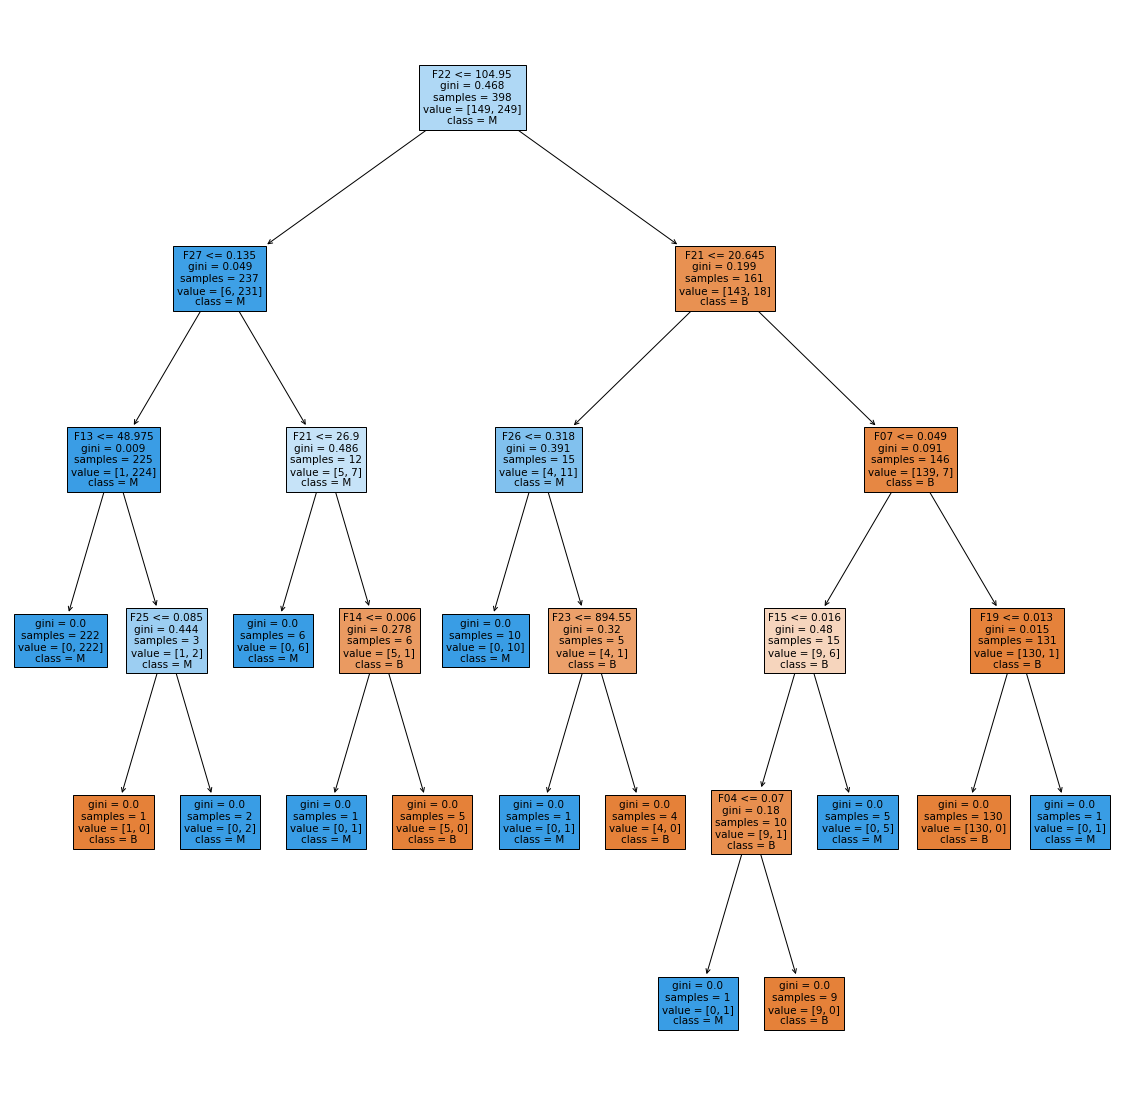

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 

# data preprocessing
data = pd.read_csv("DecTreeAssign1.csv")
list(data.columns)

# find the value count for the class var
print(data['Class'].value_counts())

# drop na values
pd.isnull(data).sum() # no null so do not drop

# load packages for building the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree

# convert response (Class) to int since sklearn do not accept categorical var as response
response = data['Class']
response = np.where(response == 'M', -1, 1) # let M = -1, B = 1

# extract the predictor matrix
X = data.drop('Class', 1)

# split data to 30% testing and 70% training
XTrain, XTest, yTrain, yTest = train_test_split(X, response, test_size=0.3, random_state=1)

# training data
obj = DecisionTreeClassifier()
trainObj = obj.fit(XTrain,yTrain)
yHat = trainObj.predict(XTest)

# check accuracy against the original y
print("Accuracy of decision tree metric:",metrics.accuracy_score(yTest, yHat))

# view the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(yTest, yHat))
print(classification_report(yTest, yHat))

# build the tree
fig = plt.figure(figsize=(20,20))
myTree = tree.plot_tree(trainObj, 
                   feature_names=X.columns,  
                   class_names=["B","M"],
                   filled=True)

In [ ]:
# Compare the accuracy of Knn and that of Decision Tree metrics
# import knn related packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# scale the train and test predictors (necessary for knn)
myScaler = StandardScaler()
myScaler.fit(XTrain)
XTrain = myScaler.transform(XTrain)
XTest = myScaler.transform(XTest)

# initiate knn classifier
knnClassifier = KNeighborsClassifier(n_neighbors = 5)
knnClassifier.fit(XTrain, yTrain)

# predict the class for the test set
yHat = knnClassifier.predict(XTest)

# view the confusion matrix
print(confusion_matrix(yTest, yHat))
print(classification_report(yTest, yHat))

[[ 57   6]
 [  1 107]]
              precision    recall  f1-score   support

          -1       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
# Note: from the confusion matrix of two metrics, we may see that KNN performs slightly better than that of decision tree as its prediction is slightly more accurate